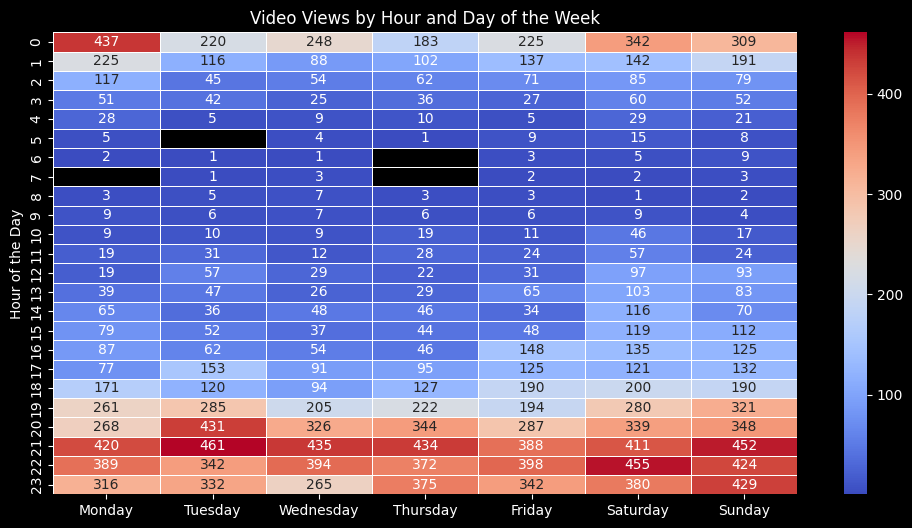

In [12]:
import os
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

connection = sqlite3.connect(os.getenv("SQLITE_DB_FILE"))
cursor = connection.cursor()

query = """
SELECT activity.timestamp, video.title, video.length, channel.name AS channel_name, category.name AS category_name
FROM activity
JOIN video ON activity.video_id = video.id
JOIN channel ON activity.channel_id = channel.id
JOIN category ON channel.category_id = category.id"""

df = pd.read_sql_query(query, connection)
connection.close()

# Convert the timestamp column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Convert UTC timestamp to Finnish local time
utc_zone = pytz.timezone('UTC')
finland_zone = pytz.timezone('Europe/Helsinki')
df['timestamp'] = df['timestamp'].apply(lambda x: x.replace(tzinfo=utc_zone).astimezone(finland_zone))

df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Create a pivot table with hour and day_of_week
pivot_df = df.pivot_table(index='hour', columns='day_of_week', values='title', aggfunc='count')

plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5)
plt.title('Views by Hour and Day of the Week')
plt.xlabel('')
plt.ylabel('Hour of the Day')

weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap.set_xticks([x + 0.5 for x in range(len(weekday_labels))])
heatmap.set_xticklabels(weekday_labels)

plt.show()
